In [48]:
import pandas as pd
import math
import numpy as np
from scipy import stats
# ファイルを読み込む
pd_reader = pd.read_csv("data_10.csv", encoding="ANSI")
df = pd_reader
df = df.dropna()
display(df)

,yyyymm,code,企業名,業種コード,時価総額,時価総額比率,翌1M収益率,PER,PBR,配当利回り,reversal,売買回転率,ボラティリティ,自己資本比率,ROE,売上高成長率,売上高営業利益率,accrual比率
0,200501,1301,極洋,50,2.316796e+10,0.000063,6.132075,189.794091,16.584526,0.001887,-1.431930,9.964968,9.798452,9.671801,22.033898,-6.904708,2.074782,-1.839077
2,200501,1332,日本水産,50,9.563755e+10,0.000262,1.159420,32.363977,1.172632,0.014493,-2.771182,5.234294,6.459922,7.273836,13.135825,-1.033593,2.058652,-5.059100
5,200501,1377,サカタのタネ,50,6.801676e+10,0.000186,7.709581,44.592790,0.797050,0.011976,-1.250619,1.125892,5.149895,14.049036,11.377778,-1.197643,5.010696,-3.497690
6,200501,1379,ホクト,50,6.111376e+10,0.000167,5.185590,18.929531,2.087107,0.019105,-1.496639,13.092703,8.931864,15.276929,57.945455,-0.715937,15.196409,-4.119216
8,200501,1515,日鉄鉱業,1050,3.708430e+10,0.000102,3.378378,179.684338,6.261811,0.001351,-3.555567,6.448508,11.550462,2.734702,50.191571,-1.649354,5.046806,-1.509456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352774,202012,9991,ジェコス,6050,3.497868e+10,0.000051,-1.875000,7.930607,0.626317,0.036458,0.793522,1.528977,8.024715,55.914685,7.969035,32.833341,5.524504,-6.987187
352775,202012,9993,ヤマザワ,6100,1.914856e+10,0.000028,0.000000,-86.271605,0.676529,0.015455,-0.322500,0.719836,3.389391,55.916395,-0.782445,-3.988063,0.571512,-7.163312
352776,202012,9994,やまや,6100,2.360497e+10,0.000034,-0.459559,114.646997,0.738982,0.021140,0.307323,1.313622,9.612572,50.333228,0.643218,-0.710275,2.475501,-0.745420
352777,202012,9995,グローセル,6050,1.189206e+10,0.000017,9.555556,164.233577,0.481392,0.026667,-0.156039,1.864017,6.532688,70.537413,0.287420,-12.388195,-0.088838,-5.330464


In [23]:
# 時間推移関数
def nextym(yyyymm):
    yyyymm = yyyymm + 1
    if yyyymm % 100 == 13:
        yyyymm = yyyymm + 88
    return yyyymm

# Ｔ検定関数
def student(x_bar, y_bar, var_x, var_y, n_x, n_y):
    T = (x_bar - y_bar) / math.sqrt(var_x/n_x + var_y/n_y)
    print(T)
    if T > 2:
        print('有意差あり')
    else:
        print('有意差なし')
    return

In [20]:
# 時価加重収益率の計算関数
def rtncalculation(matrix):
    
    capitalization = matrix.loc[:, '時価総額']
    
    #収益率の抽出
    overall_rtn = matrix.loc[:, '翌1M収益率']
    overall_rtn = overall_rtn.values
    
    #時価加重ウェイトの計算
    weight = capitalization / sum(capitalization)
    weight = weight.values
    
    #収益率の計算
    rtn = np.dot(weight, overall_rtn)
    return rtn

In [58]:
yyyymm = 200501
top_total = 0
bot_total = 0
top_rtn = []
bot_rtn = []
TOP = []
BOT = []
sample = 0
SPD = []
while yyyymm <= 202012:
    #print(yyyymm)
    tmp = df[df['yyyymm'] == yyyymm]
    top = tmp.loc[:, '時価総額'].quantile(q=0.9)
    bot = tmp.loc[:, '時価総額'].quantile(q=0.1)
    tmp_2 = tmp[tmp.時価総額 >= top]
    top_rtn0 = tmp_2.loc[:, '翌1M収益率'].mean()
    
    #print(top_rtn)
    tmp_2 = tmp[tmp.時価総額 <= bot]
    bot_rtn0= tmp_2.loc[:, '翌1M収益率'].mean()
    
    #print(bot_rtn)
    
    spd0 = bot_rtn0 - top_rtn0
    SPD.append(spd0)
    
    TOP.append(top_rtn0)
    top_sum = top_sum + top_rtn0
    top_rtn.append(top_sum)
    BOT.append(bot_rtn0)
    bot_sum = bot_sum + bot_rtn0
    bot_rtn.append(bot_sum)
    
    yyyymm = nextym(yyyymm)
    sample = sample + 1
    
spd = bot_total - top_total

print('小型効果:',bot_total,top_total)
print('スプレッドリターン:',spd)
print('平均:',pd.DataFrame(SPD).mean(),'\n標準偏差:',pd.DataFrame(SPD).std())

list1 = pd.Series(BOT)
list2 = pd.Series(TOP)
levene = stats.levene(list1, list2, center='median')
print(stats.stats.ttest_ind(list1, list2, equal_var=True))

小型効果: 198.15373168232063 81.21406638018384
スプレッドリターン: 116.93966530213679
平均: 0    0.609061
dtype: float64 
標準偏差: 0    3.443006
dtype: float64
Ttest_indResult(statistic=1.0841214550101899, pvalue=0.27899470903344487)


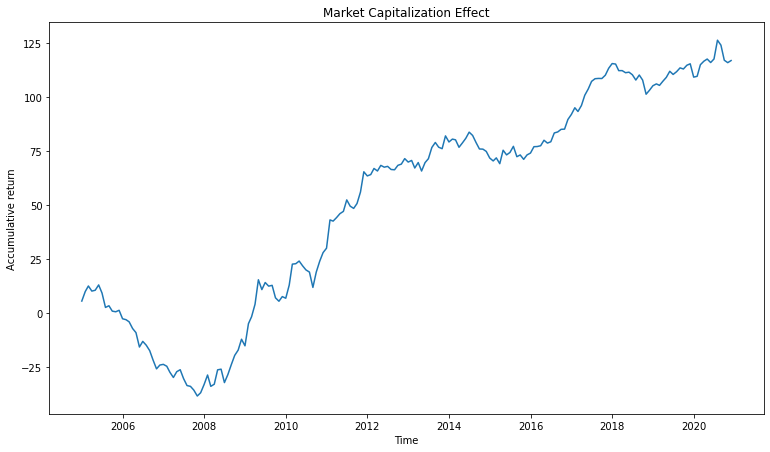

In [61]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12.8, 7.2)
x=pd.date_range('2004-12-01','2020-12-01',freq='M')

plt.plot(x, np.array(bot_rtn) - np.array(top_rtn))

plt.xlabel("Time")
plt.ylabel("Accumulative return")
plt.title('Market Capitalization Effect')

plt.show()